# Feature Selection

In [1]:
cd ..

/home/jovyan/Project_3_madelon


In [2]:
%run __init__.py

In [3]:
result_df = pd.read_pickle('data/4000_results_df.p')

In [4]:
result_df = result_df.drop('target', 1)

### Find top features

In [5]:
# creates three samples of 10% of the dataset (only 4000 observations in dataset so each has 400 observations)

sample0_all = result_df.sample(frac = 0.1, random_state = 42)
sample1_all = result_df.sample(frac = 0.1, random_state = 1)
sample2_all = result_df.sample(frac = 0.1, random_state = 27)

In [6]:
# calculates the R^2 value for each features based on the other features' ability to predict that feature

sample0_r2_df = create_r2_dataframe(sample0_all)
sample1_r2_df = create_r2_dataframe(sample1_all)
sample2_r2_df = create_r2_dataframe(sample2_all)

In [7]:
sample0_r2_df.columns = ['sample0_DecisionTree', 'sample0_KNeighbors']
sample1_r2_df.columns = ['sample1_DecisionTree', 'sample1_KNeighbors']
sample2_r2_df.columns = ['sample2_DecisionTree', 'sample2_KNeighbors']

In [8]:
# dataframe of all R^2 values from high to low on sample0 DecisionTreeClassifier R^2 score

r2_df = pd.concat([sample0_r2_df, sample1_r2_df, sample2_r2_df], axis=1, join_axes=[sample0_r2_df.index])
r2_df.sort('sample0_DecisionTree', ascending=False)

,sample0_DecisionTree,sample0_KNeighbors,sample1_DecisionTree,sample1_KNeighbors,sample2_DecisionTree,sample2_KNeighbors
639,0.927408,0.765546,0.928160,0.736336,0.865986,0.654629
956,0.886172,0.762094,0.901443,0.721654,0.873643,0.648066
867,0.819643,0.616547,0.772777,0.636942,0.695628,0.585044
336,0.781835,0.631073,0.752961,0.696783,0.672042,0.522090
920,0.749918,0.493926,0.694970,0.419661,0.662646,0.527689
701,0.745191,0.516612,0.780464,0.576887,0.670117,0.547489
269,0.739760,0.485213,0.708770,0.662076,0.837314,0.608524
504,0.723879,0.542038,0.482788,0.452808,0.437115,0.356188
341,0.711988,0.670392,0.778390,0.711253,0.747792,0.703786
395,0.704585,0.552216,0.727241,0.599737,0.746817,0.624806


The dataset we were given has 5 informative features and 15 redundant features. This means there are a total of 20 relevant features. In the table above, the R^2 values that were returned for each feature show that there are exactly 20 R^2 values that are positive for both regressors in all 3 samples(and all above 0.24). I claim that these 20 features are the 20 relevant features.

These 20 features are: 257, 269, 308, 315, 336, 341, 395, 504, 526, 639, 681, 701, 724, 736, 769, 808, 829, 867, 920, and 956.

### Using only 20 features

In [9]:
%matplotlib inline

In [10]:
# loads in dataset of 60,000 observations for 20 features and the targets variable

informative_result_df = pd.read_pickle('data/informative_results_df.p')

In [11]:
targets = informative_result_df['target']
df = informative_result_df.drop('target', 1)

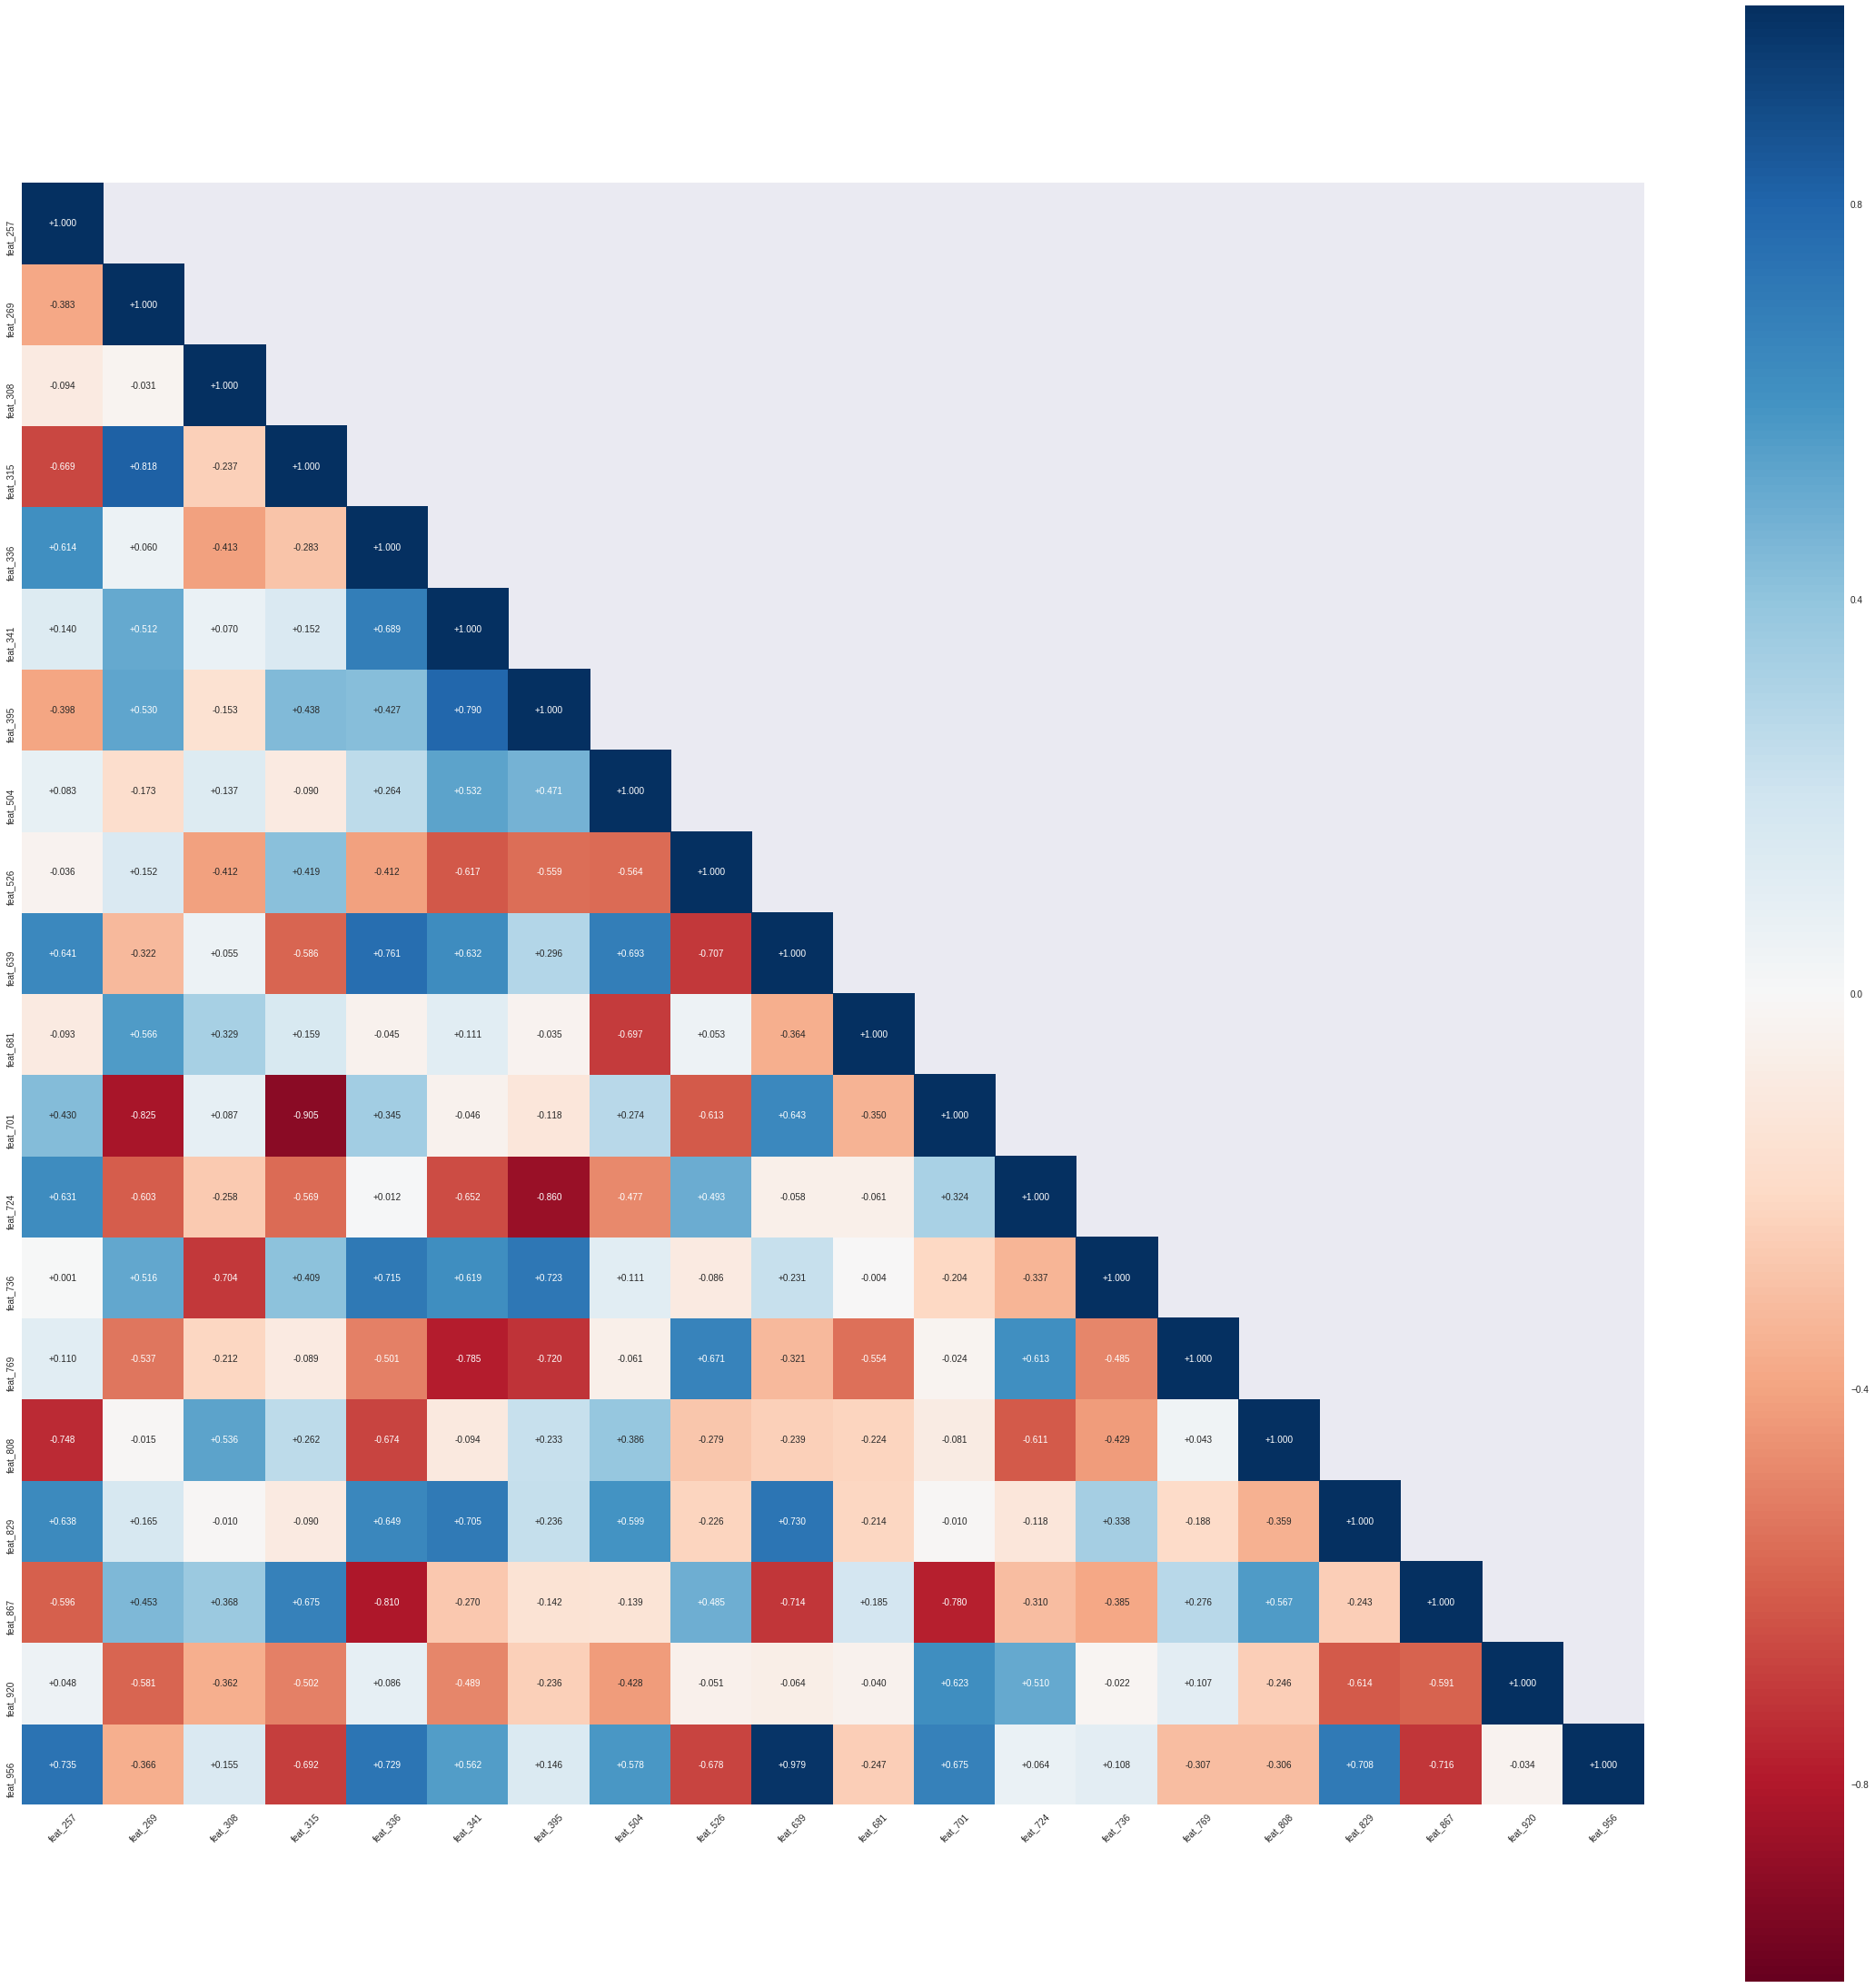

In [12]:
# display correlation heat map with the 20 features

fig, ax = plt.subplots(figsize=(40, 40))

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

### Feature Selection using SKBest

Creates 3 samples of 20,000 observations and of the top 20 features and determines the 5 best features for finding the target for each sample set. These five features are then used to fit three different models and the test and train scores are displayed.

In [13]:
# feature selection function using SelectKBest where k = 5 since we know there are 5 non-redundant features

def feature_selection_skb(X, y):
    skb = SelectKBest(k = 5)
    skb.fit(X, y)
    
    skb_feats = np.where(skb.get_support())[0]
    return skb_feats

In [14]:
# creates madelon_train_full from the df dataframe of 60,000 observations and also adds the targets column

madelon_train_full = df
madelon_train_full['target'] = targets

In [15]:
# creates the samples of 20,000 and creates a target variable and drops the target from the sample

sample0_twenty = madelon_train_full.sample(frac = 0.33, random_state = 42)
sample1_twenty = madelon_train_full.sample(frac = 0.33, random_state = 43)
sample2_twenty = madelon_train_full.sample(frac = 0.33, random_state = 44)

sample0_twenty_target = sample0_twenty['target']
sample1_twenty_target = sample1_twenty['target']
sample2_twenty_target = sample2_twenty['target']

sample0_twenty = sample0_twenty.drop('target', 1)
sample1_twenty = sample1_twenty.drop('target', 1)
sample2_twenty = sample2_twenty.drop('target', 1)

In [16]:
# scales all three samples

ss0_twenty = StandardScaler()
ss1_twenty = StandardScaler()
ss2_twenty = StandardScaler()

sample0_twenty_sc = ss0_twenty.fit_transform(sample0_twenty)
sample1_twenty_sc = ss1_twenty.fit_transform(sample1_twenty)
sample2_twenty_sc = ss2_twenty.fit_transform(sample2_twenty)

In [17]:
# prints the 5 best features for the scaled version and using SKBest for each sample

print("For sample0, the 5 best features are {}".format(feature_selection_skb(sample0_twenty_sc, sample0_twenty_target)))
print("For sample1, the 5 best features are {}".format(feature_selection_skb(sample1_twenty_sc, sample1_twenty_target)))
print("For sample2, the 5 best features are {}".format(feature_selection_skb(sample2_twenty_sc, sample2_twenty_target)))

For sample0, the 5 best features are [ 1  5 10 11 18]
For sample1, the 5 best features are [ 1  5 10 11 18]
For sample2, the 5 best features are [ 1  5 10 11 18]


Five informative features are 269, 341, 381, 701, 920

In [22]:
# creates a new dataframe (new_df) from df of 60,000 observations of only the top 5 features and the target variable

new_df = df.iloc[:, [1, 5, 10, 11, 18]]

new_df['target'] = targets

In [29]:
def train_test_scores(dataframe, model, scaled = False):
    
    i = 42
    train_scores = list()
    test_scores = list()
    
    for random_state in range(3):
    
        sample = dataframe.sample(frac = 0.33, random_state = i+random_state)
        sample_target = sample['target']
        sample = sample.drop('target', 1)
        
        X_train, X_test, y_train, y_test = train_test_split(sample, sample_target, test_size = 0.2, random_state = 42)
            
        classifier = model
        
        classifier.fit(X_train, y_train)
        train_score = classifier.score(X_train, y_train)
        test_score = classifier.score(X_test, y_test)
        
        if scaled:
            ss = StandardScaler()
            X_train_sc = ss.fit_transform(X_train)
            X_test_sc = ss.transform(X_test)
            
            classifier_sc = model
            classifier_sc.fit(X_train_sc, y_train)
            
            train_score = classifier_sc.score(X_train_sc, y_train)
            test_score = classifier_sc.score(X_test_sc, y_test)
            
        train_scores.append(train_score)
        test_scores.append(test_score) 
        
    avg_train_score = sum(train_scores)/len(train_scores)
    avg_test_score = sum(test_scores)/len(test_scores)
        
    return avg_train_score, avg_test_score

In [26]:
lr_scores = train_test_scores(new_df, LogisticRegression())
scores

(0.6098063973063973, 0.59587542087542078)

In [28]:
lr_scores_sc = train_test_scores(new_df, LogisticRegression(), scaled=True)
lr_scores_sc

(0.61022727272727273, 0.59503367003367014)

In [31]:
knc_scores = train_test_scores(new_df, KNeighborsClassifier())
knc_scores

(0.82430555555555551, 0.72811447811447805)

In [33]:
knc_scores_sc = train_test_scores(new_df, KNeighborsClassifier(), scaled=True)
knc_scores_sc

(0.82493686868686866, 0.73316498316498313)

In [35]:
dtc_scores = train_test_scores(new_df, DecisionTreeClassifier())
dtc_scores

(1.0, 0.67239057239057232)

In [36]:
dtc_scores_sc = train_test_scores(new_df, DecisionTreeClassifier(), scaled=True)
dtc_scores_sc

(1.0, 0.6742424242424242)

In [37]:
rf_scores = train_test_scores(new_df, RandomForestClassifier())
rf_scores

(0.98558501683501687, 0.7151515151515152)

In [38]:
rf_scores_sc = train_test_scores(new_df, RandomForestClassifier(), scaled=True)
rf_scores_sc

(0.98636363636363633, 0.71675084175084169)

### Feature Selection using RFE

In [39]:
informative_feats = ['feat_257', 'feat_269', 'feat_308', 'feat_315', 'feat_336', 'feat_341', 'feat_395', 'feat_504', 'feat_526', 'feat_639', 'feat_681', 'feat_701', 'feat_724', 'feat_736', 'feat_769', 'feat_808', 'feat_829', 'feat_867', 'feat_920', 'feat_956']

In [40]:
# using only the 20 features that were found to be informative from the R2 inspection, create a train and target dataframe from the full train dataset and scale

informative_train = df[informative_feats]
target_train = df['target']

ss = StandardScaler()
informative_train_sc = ss.fit_transform(informative_train)

In [42]:
# RFE using the DecisionTreeClassifier, LogisticeRegression, and RandomForestClassifier and selecting 5 features
rfe_tree = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=5, step=1, verbose=1)
rfe_lr = RFE(LogisticRegression(), n_features_to_select = 5, step = 1, verbose = 1)
rfe_rf = RFE(RandomForestClassifier(), n_features_to_select = 5, step = 1, verbose = 1)

In [43]:
rfe_tree.fit(sample0_twenty, sample0_twenty_target)
rfe_lr.fit(sample0_twenty, sample0_twenty_target)
rfe_rf.fit(sample0_twenty, sample0_twenty_target)

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=1)

In [44]:
# the 5 features that were found to be the most informative from the RFE fit models
rfe_tree_feats = np.where(rfe_tree.get_support())[0]
rfe_lr_feats = np.where(rfe_lr.get_support())[0]
rfe_rf_feats = np.where(rfe_rf.get_support())[0]

### Feature Selection using SelectFromModel

In [45]:
# using both the DecisionTreeClassifier and the KNeighborsClassifier, use the SelectFromModel function to determine the most informative features
sfm_decisiontree = SelectFromModel(DecisionTreeClassifier(random_state=42), threshold='mean')
sfm_lr = SelectFromModel(LogisticRegression(), threshold='mean')
sfm_rf = SelectFromModel(RandomForestClassifier(random_state=42), threshold = 'mean')

In [47]:
# scale the data and fit the two SFMs
ss = StandardScaler()
madelon_train_sc = ss.fit_transform(sample0_twenty)

sfm_decisiontree.fit(madelon_train_sc, sample0_twenty_target)
sfm_lr.fit(madelon_train_sc, sample0_twenty_target)
sfm_rf.fit(madelon_train_sc, sample0_twenty_target)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
        prefit=False, threshold='mean')

In [48]:
# find the features that the model found to be the most informative
sfm_dtree_feats = np.where(sfm_decisiontree.get_support())[0]
sfm_lr_feats = np.where(sfm_lr.get_support())[0]
sfm_rf_feats = np.where(sfm_rf.get_support())[0]

### Feature Selection using SelectPercentile

In [49]:
# select the top 25% most informative features
selectperc = SelectPercentile(percentile=25)

In [50]:
ss = StandardScaler()
madelon_train_sc = ss.fit_transform(sample0_twenty)

In [51]:
selectperc.fit(madelon_train_sc, sample0_twenty_target)

SelectPercentile(percentile=25,
         score_func=<function f_classif at 0x7fa5c122abf8>)

In [52]:
sp_features = np.where(selectperc.get_support())[0]

### Compare all Feature Selection Models

In [53]:
# SelectPercentile features from most informative to least informative

spercentile_feats = informative_train.iloc[:, selectperc.pvalues_.argsort()[:5]].columns
spercentile_feats

Index(['feat_269', 'feat_701', 'feat_681', 'feat_920', 'feat_341'], dtype='object')

In [54]:
# RFE features in order of feature number

rfe_tree_feats = informative_train.iloc[:, rfe_tree_feats].columns
rfe_lr_feats = informative_train.iloc[:, rfe_lr_feats].columns
rfe_rf_feats = informative_train.iloc[:, rfe_rf_feats].columns

In [55]:
# Top 5 RFE features for DecisionTreeClassifier

rfe_tree_feats

Index(['feat_269', 'feat_308', 'feat_724', 'feat_769', 'feat_829'], dtype='object')

In [70]:
# Top 5 RFE features for LogisticRegression

rfe_lr_feats

Index(['feat_269', 'feat_504', 'feat_681', 'feat_829', 'feat_920'], dtype='object')

In [57]:
# Top 5 RFE features for RandomForestClassifier

rfe_rf_feats

Index(['feat_269', 'feat_308', 'feat_395', 'feat_808', 'feat_920'], dtype='object')

In [58]:
# SelectKBest features in order of feature numbers

skb_feats = informative_train.iloc[:, feature_selection_skb(informative_train, target_train)].columns
skb_feats

Index(['feat_269', 'feat_341', 'feat_681', 'feat_701', 'feat_920'], dtype='object')

In [59]:
# SelectFromModel with the DecisionTreeClassifier model in order of feature numbers

sfm_tree_feats = informative_train.iloc[:, sfm_dtree_feats].columns
sfm_lr_feats = informative_train.iloc[:, sfm_lr_feats].columns
sfm_rf_feats = informative_train.iloc[:, sfm_rf_feats].columns

In [60]:
# Top SFM features for DecisionTreeClassifier

sfm_tree_feats

Index(['feat_269', 'feat_308', 'feat_681', 'feat_724', 'feat_736', 'feat_769',
       'feat_808', 'feat_829', 'feat_920'],
      dtype='object')

In [61]:
# Top SFM features for LogisticRegression

sfm_lr_feats

Index(['feat_257', 'feat_269', 'feat_308', 'feat_341', 'feat_504', 'feat_681',
       'feat_701', 'feat_769', 'feat_808', 'feat_829', 'feat_920'],
      dtype='object')

In [62]:
# Top SFM features for RandomForestClassifier

sfm_rf_feats

Index(['feat_269', 'feat_308', 'feat_395', 'feat_504', 'feat_681', 'feat_724',
       'feat_769', 'feat_808', 'feat_920', 'feat_956'],
      dtype='object')

In [63]:
# creates a union of all of the features found from the different techniques above

union1 = np.union1d(spercentile_feats, rfe_tree_feats)
union2 = np.union1d(union1, rfe_lr_feats)
union3 = np.union1d(union2, skb_feats)
union4 = np.union1d(union3, sfm_tree_feats)
union = np.union1d(union4, sfm_lr_feats)
union

array(['feat_257', 'feat_269', 'feat_308', 'feat_341', 'feat_504',
       'feat_681', 'feat_701', 'feat_724', 'feat_736', 'feat_769',
       'feat_808', 'feat_829', 'feat_920'], dtype=object)

In [67]:
# only features that were found in the union above (cut down from 20 to 16 features)

informative_features = ['feat_257', 'feat_269', 'feat_308', 'feat_341', 'feat_504',
       'feat_681', 'feat_701', 'feat_724', 'feat_736', 'feat_769',
       'feat_808', 'feat_829', 'feat_920']

In [68]:
thirteen_feats_df = df[informative_features]
thirteen_feats_df['target'] = df['target']
thirteen_feats_df.head()

,feat_257,feat_269,feat_308,feat_341,feat_504,feat_681,feat_701,feat_724,feat_736,feat_769,feat_808,feat_829,feat_920,target
_id,,,,,,,,,,,,,,
174089,-0.923105,4.699732,-0.242478,3.962257,1.489408,0.325393,-3.881484,-3.799436,2.024551,-1.388278,0.346974,2.606601,-2.916028,0
187583,1.833151,-6.826708,1.821904,0.714624,4.829119,-3.244974,7.246274,0.456341,-2.031302,0.545299,1.371061,1.750689,1.061643,1
187823,-0.012903,-1.278724,-1.154903,-3.054414,-2.913875,0.753169,0.871490,2.709859,-0.148805,0.594875,-1.013036,-2.871605,2.470843,0
181652,-1.576410,1.739444,-1.718739,2.603980,-1.778501,1.798205,1.959414,-2.316741,3.280165,-3.968717,-0.699272,-2.816292,3.189007,1
185716,0.696104,2.894396,0.477329,1.617239,-1.518712,2.105841,-2.088652,-0.062887,0.548372,-1.283143,-1.184725,1.249025,-1.132918,0


H0: The feature is not important in determining the target variable

In [69]:
# calculates the p-value of each feature for calculating the target value. With the 0.05 threshold, 
# the features can again be cut down, this time from 16 features to just 11 features

for feat in thirteen_feats_df:
    model = ols("target ~ {}".format(feat), thirteen_feats_df).fit()
    print("{:25} {}".format(feat, model.pvalues[1]))

feat_257                  7.171700943545141e-20
feat_269                  0.0
feat_308                  8.219594497753205e-17
feat_341                  1.5204943817269444e-215
feat_504                  7.510135616722164e-45
feat_681                  0.0
feat_701                  0.0
feat_724                  3.585360678904233e-45
feat_736                  7.982302927516049e-81
feat_769                  3.44651774818641e-173
feat_808                  5.422579329704858e-106
feat_829                  2.99147931655735e-179
feat_920                  0.0
target                    0.0


All p-values are small enough that the null hypothesis is rejected. However, the features that have a 0.0 p-value are most likely the part of the original 5 features, and there are 4 features with a 0.0 p-value and one with a 10^-215 which is virtually equal to 0. These features are 269, 341, 681, 701, and 920.